## Image Recognition 
#### Binary class image classification
###### Aditya Hajare | https://www.linkedin.com/in/aditya-hajare

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image
from IPython.display import display

Using TensorFlow backend.


In [4]:
# Initialize CNN
classifier = Sequential()

In [5]:
# Convolution(64 feature detector of dimension 3x3), input shape 3 layer for color image))
classifier.add(Conv2D(64,(3,3),input_shape = (128,128,3), activation = 'relu'))

# MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [6]:
# Flatten
classifier.add(Flatten())

In [7]:
# Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [8]:
# output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [11]:
# Scaling data import
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Scale test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Import training data
train_set = train_datagen.flow_from_directory('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/train',target_size=(128, 128),class_mode='binary')

Found 400 images belonging to 2 classes.


In [14]:
train_set.class_indices

{'indoor': 0, 'outdoor': 1}

In [15]:
# Print labels for cats and dogs
label_map = (train_set.class_indices)
print(label_map)

{'indoor': 0, 'outdoor': 1}


In [16]:
# Import test data
test_set = test_datagen.flow_from_directory('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/test',target_size=(128, 128),class_mode='binary')

Found 100 images belonging to 2 classes.


In [17]:
# fitting model to images
classifier.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
13/13 [==============================] - 13s 969ms/step - loss: 0.6255 - accuracy: 0.6400 - val_loss: 0.8674 - val_accuracy: 0.6800
Epoch 2/10
13/13 [==============================] - 9s 671ms/step - loss: 0.5687 - accuracy: 0.7350 - val_loss: 0.3896 - val_accuracy: 0.8800
Epoch 3/10
13/13 [==============================] - 8s 615ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.1683 - val_accuracy: 0.9100
Epoch 4/10
13/13 [==============================] - 9s 671ms/step - loss: 0.1737 - accuracy: 0.9425 - val_loss: 0.0159 - val_accuracy: 0.9000
Epoch 5/10
13/13 [==============================] - 9s 671ms/step - loss: 0.2016 - accuracy: 0.9150 - val_loss: 0.5032 - val_accuracy: 0.9000
Epoch 6/10
13/13 [==============================] - 8s 619ms/step - loss: 0.1316 - accuracy: 0.9525 - val_loss: 0.0965 - val_accuracy: 0.9100
Epoch 7/10
13/13 [==============================] - 8s 645ms/step - loss: 0.0764 - accuracy: 0.9725 - val_loss: 0.1905 - val_accuracy: 0.8800
Epoch

In [18]:
# save Model
classifier.save('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/adi_indooroutdoor')

In [19]:
# Restore model
classifier = keras.models.load_model('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/adi_indooroutdoor')

In [20]:
# Testing Predictions
import numpy as np
from tensorflow.keras.preprocessing import image

## INDOOR IMAGES
img1= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/indoor/images271.jpg', target_size =(128,128))
img2= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/indoor/images275.jpg', target_size =(128,128))
img3= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/indoor/images284.jpg', target_size =(128,128))
img4= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/indoor/images259.jpg', target_size =(128,128))
img5= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/indoor/images283.jpg', target_size =(128,128))

## OUTDOOR IMAGES
img6= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/outdoor/Moon-tree-natural-scenery-Stock-Photo.jpg', target_size =(128,128))
img7= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/outdoor/Natural_scenery_of_nepal_09.jpg', target_size =(128,128))
img8= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/outdoor/nature-scenery-beautiful-mountain-wallpaper-wallpaper-preview.jpg', target_size =(128,128))
img9= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/outdoor/pngtree-creative-spring-travel-natural-scenery-background-synthesis-image_198949.jpg', target_size =(128,128))
img10= image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/Photographs/validation/outdoor/Parks-Gardens-Peninsula-Park-Rose-Garden-Photo-by-Ashley-Anderson.jpg', target_size =(128,128))


In [21]:
# Convert images to array
img6_arr = image.img_to_array(img6)
img7_arr = image.img_to_array(img7)
img9_arr = image.img_to_array(img9)

img1_arr = image.img_to_array(img1)
img3_arr = image.img_to_array(img3)
img4_arr = image.img_to_array(img4)

In [22]:
# Change the dimension
img_dim6 = img6_arr.reshape(1,128,128,3)
img_dim7 = img7_arr.reshape(1,128,128,3)
img_dim9 = img9_arr.reshape(1,128,128,3)

img_dim1 = img1_arr.reshape(1,128,128,3)
img_dim3 = img3_arr.reshape(1,128,128,3)
img_dim4 = img4_arr.reshape(1,128,128,3)

In [23]:
if classifier.predict(img_dim6) == 1: prediction6 = 'OUTDOOR' 
else: prediction6 = 'INDOOR'

if classifier.predict(img_dim7) == 1: prediction7 = 'OUTDOOR' 
else: prediction7 = 'INDOOR'

if classifier.predict(img_dim9) == 1: prediction9 = 'OUTDOOR' 
else: prediction9 = 'INDOOR'


if classifier.predict(img_dim1) == 1: prediction1 = 'OUTDOOR' 
else: prediction1 = 'INDOOR'

if classifier.predict(img_dim3) == 1: prediction3 = 'OUTDOOR' 
else: prediction3 = 'INDOOR'

if classifier.predict(img_dim4) == 1: prediction4 = 'OUTDOOR' 
else: prediction4 = 'INDOOR'

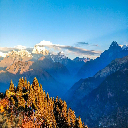

'OUTDOOR'

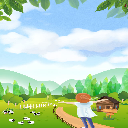

'OUTDOOR'

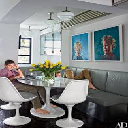

'INDOOR'

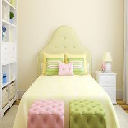

'INDOOR'

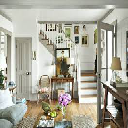

'INDOOR'

In [26]:
display(img7)
display(prediction7)

display(img9)
display(prediction9)

display(img1)
display(prediction1)

display(img3)
display(prediction3)

display(img4)
display(prediction4)